# Descripción del Proyecto / Project Description
Este proyecto tiene como objetivo analizar los datos de ventas de videojuegos de la tienda online Ice con el fin de identificar patrones que permitan predecir el éxito de los juegos en el mercado. Se parte de un conjunto de datos históricos hasta el 2016 para proyectar tendencias y orientar decisiones de marketing para el año siguiente, 2017.

El dataset contiene información clave sobre los videojuegos, incluyendo el nombre, la plataforma de lanzamiento, el año de publicación, el género, las ventas en diferentes regiones del mundo, así como las calificaciones de críticos y usuarios. A través de este análisis, se busca determinar qué factores influyen en el rendimiento de los videojuegos en diversas plataformas y regiones.

---

This project aims to analyze video game sales data from the Ice online store in order to identify patterns to predict the success of games in the market. It starts from a historical dataset up to 2016 to project trends and guide marketing decisions for the following year, 2017.

The dataset contains key information about video games, including name, release platform, year of release, genre, sales in different regions of the world, as well as critic and user ratings. Through this analysis, we seek to determine what factors influence the performance of video games on various platforms and regions.

**Metodología / Methodology:**
- Preparación de los datos: Se realiza un proceso de limpieza y transformación de los datos, que incluye la modificación de los nombres de las columnas, conversión de tipos de datos y el tratamiento de valores ausentes.
- Análisis exploratorio: Se lleva a cabo un análisis de las ventas por plataforma y género, buscando identificar patrones y tendencias de popularidad. También se elabora un perfil de usuario para diferentes regiones (Norteamérica, Europa, Japón).
- Visualización de los datos: Se emplean gráficos de dispersión, diagramas de caja y otras visualizaciones para analizar la relación entre las variables, como la calificación de los usuarios y las ventas por plataforma.
- Pruebas estadísticas: Se realizan pruebas para comparar las calificaciones promedio de diferentes plataformas y géneros, con el fin de verificar si existen diferencias significativas en sus resultados.

----

- Data preparation: A data cleaning and transformation process is performed, including the modification of column names, conversion of data types and treatment of missing values.
- Exploratory analysis: An analysis of sales by platform and genre is carried out, seeking to identify patterns and popularity trends. A user profile is also elaborated for different regions (North America, Europe, Japan).
- Data visualization: Scatter plots, box plots and other visualizations are used to analyze the relationship between variables such as user ratings and sales by platform.
- Statistical tests: Tests are performed to compare the average ratings of different platforms and genres to verify if there are significant differences in their results.

## PREPARACION DE LOS DATOS /DATA PREPARATION

In [42]:
#Importo librerias que voy a utilizar
#Import libraries that I will use
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#Abro el archivo de datos y estudio la información general
#I open the data file and study the general information
df = pd.read_csv('/datasets/games.csv') 

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Reviso la información general de los datos
#I review the general data information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se puede observar que más de las mitad de las columnas tiene valores ausentes. Es necesario organizar los nombres de las columnas para mayor orden. Los tipos de datos son object y float. `Year_of_Release` debe ser una fecha y `User_Score` debe ser float. Los demás tipos son adecuados.

It can be observed that more than half of the columns have missing values. It is necessary to organize the column names for more order. The data types are object and float. `Year_of_Release` should be a date and `User_Score` should be float. The other types are suitable.

In [5]:
#Cambio los nombres de las columnas a solo minúsculas
#Change column names to lowercase only
new_col_name = []
for name in df.columns:
    name_lowered = name.lower()
    new_col_name.append(name_lowered)
    
df.columns = new_col_name
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

`user_score` es un object, pero al ser una calificación con la que se pueden hacer calculos, debe ser float.

`user_score` is an object, but since it is a score with which calculations can be made, it must be float.

In [6]:
#Cambio del tipo de datos de 'user_score' a float
#Changing the data type from 'user_score' to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Al ver la información general de los datos se puede observar que las columnas `name`, `year_of_release`, `genre`, `critic_score`, `user_score` y `rating` tinene valores ausentes. Unas más que otras.

When looking at the general data information it can be seen that the columns `name`, `year_of_release`, `genre`, `critic_score`, `user_score` and `rating` have missing values. Some more than others.

In [7]:
#Verifico que no haya duplicados
#I verify that there are no duplicates
print(df[df.duplicated()]) 

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [8]:
#Verifico los valores ausentes de la columna 'name'
#I check the missing values in the column 'name'
print(df[df['name'].isna()]) 

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


Los 2 valores ausentes de `name` y `genre`, tienen los valores ausentes en casi la mitad de las columnas y al no saber de que videojuego se está hablando, considero que no son datos relevantes, así que lo voy a eliminar. Además `year_of_release` está como float, por lo que lo voy a pasar a int.

The 2 missing values of `name` and `genre`, have missing values in almost half of the columns and not knowing what video game is being talked about, I consider that they are not relevant data, so I'm going to remove it. Also `year_of_release` is as float, so I am going to pass it to int.

In [9]:
#Creo un nuevo dataframe onde no existan los datos de los dos videojuegos ausentes en 'name' y 'genre'. 
#También elimino los valores ausentes de 'year_of_release' ya que al no saber de qué año se está hablando, 
#no son datos que me sirven para tomar decisiones para el 2017.

#I create a new dataframe where the data of the two missing videogames in 'name' and 'genre' do not exist. 
#I also remove the missing values of 'year_of_release' since not knowing what year we are talking about, 
#they are not data that I can use to make decisions for 2017.
df = df[(~df['name'].isna()) & (~df['genre'].isna()) & (~df['year_of_release'].isna())] 

#Cambio el 'year_of_release' de float a int
#Change the 'year_of_release' from float to int
df['year_of_release'] = df['year_of_release'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
#Verifico la media y la mediana de critic_score y user_score para determinar si hay valores atipicos.
#I check the mean and median of critic_score and user_score for outliers.

#Saco la media de 'critic_score'
#I take the average of 'critic_score'
mean_critic_score = df['critic_score'].mean() 

#Saco la mediana de 'critic_score'
#I draw the median of 'critic_score'
median_critic_score = df['critic_score'].median() 

#Saco la media de 'user_score'
#I take the average of 'user_score'
mean_user_score = df['user_score'].mean() 

#Saco la mediana de 'user_score'
#I take the median of 'user_score'
median_user_score = df['user_score'].median() 

print('Media critic score:', mean_critic_score)
print('Mediana critic score:', median_critic_score)
print()
print('Media user score:', mean_user_score)
print('Mediana user score:', median_user_score)

Media critic score: 68.99436302142053
Mediana critic score: 71.0

Media user score: 7.126329894144447
Mediana user score: 7.5


Ambas columnas tienen valores muy similares en la media y la mediana. Para evitar sesgar nuestros resultados vamos a reemplazar los valores ausentes por la mediana.

Both columns have very similar mean and median values. To avoid biasing our results we will replace the missing values with the median.

In [11]:
#Reemplazo los valores vacios por la media
#I replace empty values by the mean value
df['critic_score'] = df['critic_score'].fillna(median_critic_score) 

#Reemplazo los valores vacios por la media
#I replace empty values by the mean value
df['user_score'] = df['user_score'].fillna(median_user_score) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Los valores ausentes de `rating` son desconocidos y al ser variables categoricas las voy a reemplazar por `unknwon`.

The missing values of `rating` are unknown and since they are categorical variables I will replace them by `unknwon`.

In [43]:
#Reemplazo los valores vacios por 'Unknown'
#I replace empty values with 'Unknown'
df['rating'] = df['rating'].fillna('Unknown') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## ANALISIS DE LOS DATOS / DATA ANALYSIS:

In [14]:
#Calculo las ventas totales
#I calculate total sales
total_sales = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#Creo una columna con las ventas totales
#I create a column with total sales
df['total_sales'] = total_sales 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown,31.38


Juegos lanzados por año / Games released per year:

In [15]:
#Agrupo cantidad de juegos lazados por año para ver su comportamiento
#Group number of games launched per year to see how they are performing
game_year = df.groupby('year_of_release')['name'].count().reset_index(name='number_of_games') 
game_year

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


En el primer año solo se lanzaron `9` juegos, a diferencia del `2016` donde se lanzaron `269 juegos`. El mayor pico de lanzamientos fue de `2006` a `2011`, con más de `1000` juegos. La mayor disminución se dio de `2011` (`1136 juegos`) a `2012` (`653 juegos`).

In the first year only `9` games were released, unlike `2016` where `269 games were released. The highest peak of releases was from `2006` to `2011`, with more than `1000` games. The largest decrease was from `2011` (`1136 games`) to `2012` (`653 games`).

Ventas por plataforma, teniendo en cuenta solo los últimos 5 años / Sales by platform, taking into account only the last 5 years:

<AxesSubplot:title={'center':'Ventas totales por plataforma'}, xlabel='Plataforma', ylabel='Ventas en millones de dólares'>

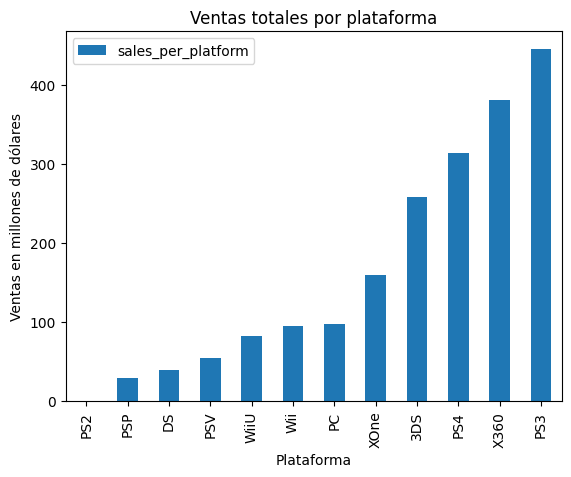

In [16]:
#Agrupo las ventas totales por plataforma
#Total sales by platform
df_relevant_years = df[df['year_of_release'] > 2010]
sales_platform = df_relevant_years.groupby('platform')['total_sales'].sum().reset_index(name='sales_per_platform').sort_values(by='sales_per_platform') 

#Grafico esta información para visualizarla mejor y determinar cuales son las plataformas con mayores ventas
#Graph this information to better visualize it and determine which platforms have the highest sales.
sales_platform.plot(kind='bar', 
                    x='platform', 
                    y='sales_per_platform', 
                    xlabel='Plataforma', 
                    ylabel='Ventas en millones de dólares', 
                    title='Ventas totales por plataforma')

De acuerdo al grafico podemos ver las plataformas con mayores ventas. Así que a partir de estas vamos a ver cómo es su comportamiento cada año:

According to the graph we can see the platforms with the highest sales. So from these we are going to see how is their behavior every year:

<AxesSubplot:title={'center':'Ventas totales por año de PS4'}, xlabel='Año', ylabel='Ventas en millones de dólares'>

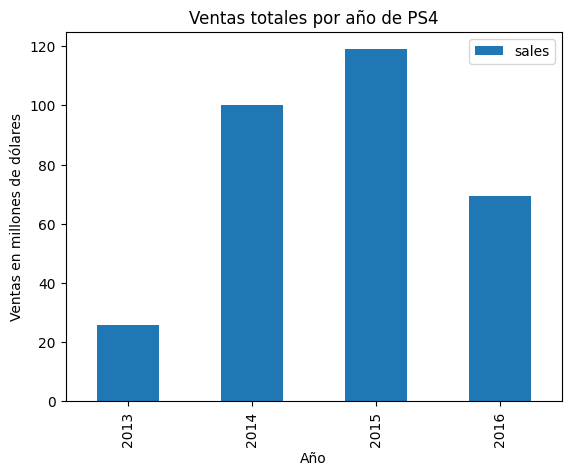

In [17]:
#Filtro un dataframe solo con ps4
#Filter a dataframe only with ps4
ps4 = df[df['platform'] == 'PS4']
sales_ps4 = ps4.groupby('year_of_release')['total_sales'].sum().reset_index(name='sales')

#Grafico para ver las ventas de PS4
#Graph to view PS4 sales
sales_ps4.plot(kind='bar', 
               x='year_of_release', 
               y='sales', 
               xlabel='Año', 
               ylabel='Ventas en millones de dólares', 
               title='Ventas totales por año de PS4')

Como se puede observar el `PS4`, creció significativamnte respecto a su año de lanzamiento (`2013`) y aunque en el `2016` disminuyero sus ventas, sigue siendo una plataforma relevante.

As can be seen the `PS4`, grew significantly compared to its launch year (`2013`) and although in `2016` its sales decreased, it is still a relevant platform.

<AxesSubplot:title={'center':'Ventas totales por año de X360'}, xlabel='Año', ylabel='Ventas en millones de dólares'>

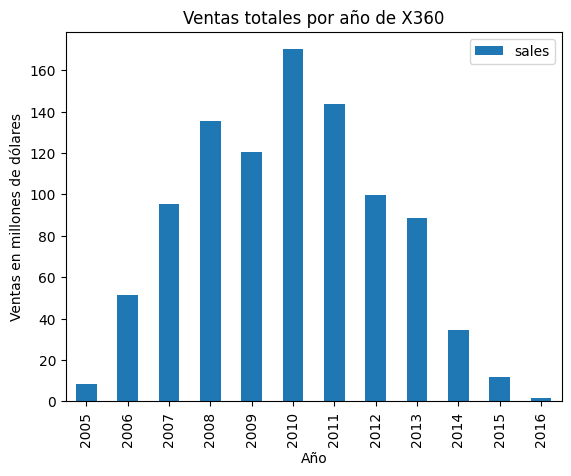

In [18]:
#Filtro un dataframe solo con X360
#Filtering a dataframe only with X360
x360 = df[df['platform'] == 'X360']
sales_x360 = x360.groupby('year_of_release')['total_sales'].sum().reset_index(name='sales')

#Grafico para ver las ventas de x360
#Graph to view x360 sales
sales_x360.plot(kind='bar', 
                x='year_of_release', 
                y='sales', 
                xlabel='Año', 
                ylabel='Ventas en millones de dólares', 
                title='Ventas totales por año de X360')

El `X360`, en su año de lanzamiento (`2005`) no tuvo mucho éxito, sin embargo en los años `2006` y `2007` comenzó a despegar y de los años `2008` a `2011` alcanzó un pico en sus ventas, hasta el `2012` que comenzó a tener un declive y en el `2016` tuvo peores ventas que en su año de lanzamiento.

The `X360`, in its launch year (`2005`) was not very successful, however in the years `2006` and `2007` began to take off and from the years `2008` to `2011` reached a peak in sales, until `2012` which began to have a decline and in `2016` had worse sales than in its launch year.

<AxesSubplot:title={'center':'Ventas totales por año de PS3'}, xlabel='Año', ylabel='Ventas en millones de dólares'>

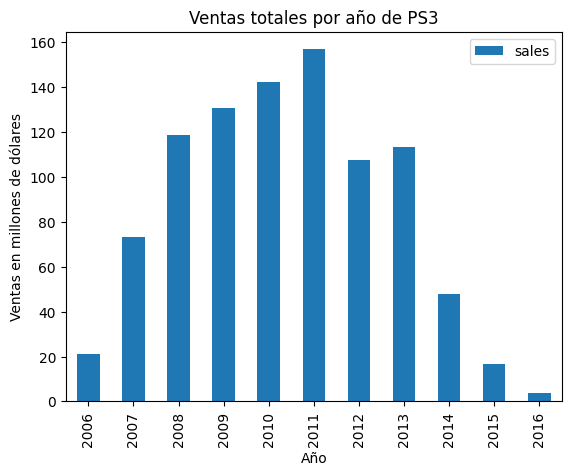

In [19]:
#Filtro un dataframe solo con PS3
#Filtering a dataframe with PS3 only
ps3 = df[df['platform'] == 'PS3']
sales_ps3 = ps3.groupby('year_of_release')['total_sales'].sum().reset_index(name='sales')

#Grafico para ver las ventas de PS3
#Graphic to see PS3 sales
sales_ps3.plot(kind='bar', 
               x='year_of_release', 
               y='sales', xlabel='Año', 
               ylabel='Ventas en millones de dólares', 
               title='Ventas totales por año de PS3')

El `PS3`, en su año de lanzamiento (`2006`) no tuvo mucho éxito, sin embargo a partir del año `2007` comenzaron a subir sus ventas hasta el años `2011` y a partir `2012` que comenzó a tener un declive y en el `2016` tuvo peores ventas que en su año de lanzamiento.

The `PS3`, in its launch year (`2006`) was not very successful, however from the year `2007` its sales began to rise until the year `2011` and from `2012` it began to have a decline and in `2016` it had worse sales than in its launch year.

<AxesSubplot:title={'center':'Ventas totales por año de 3DS'}, xlabel='Año', ylabel='Ventas en millones de dólares'>

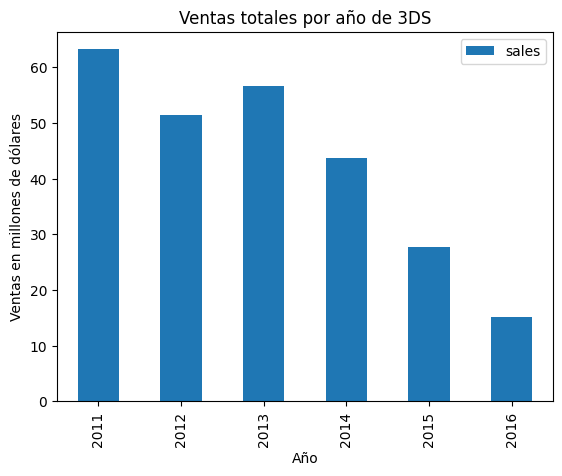

In [20]:
#Filtro un dataframe solo con 3DS
#Filtering a dataframe with 3DS only
ds3 = df[df['platform'] == '3DS']
sales_3ds = ds3.groupby('year_of_release')['total_sales'].sum().reset_index(name='sales')

#Grafico para ver las ventas de 3DS
#Graphic to see 3DS sales
sales_3ds.plot(kind='bar', 
               x='year_of_release', 
               y='sales', 
               xlabel='Año', 
               ylabel='Ventas en millones de dólares', 
               title='Ventas totales por año de 3DS')

`3DS` en su primer año (`2011`) tuvo sus mayores ventas y estas han ido decreciendo un poco con los años. Sin embargo, a `2016` sigue siendo un aplataforma relevante.

Revisando las 4 plataformas que más ventas totales han tenido, se puede evidenciar que tardan entre `9 y 10 años` en desaparecer.

---

3DS` in its first year (`2011`) had its highest sales and these have been decreasing a bit over the years. However, as of `2016` it is still a relevant platform.

Reviewing the 4 platforms that have had the highest total sales, it can be seen that it takes between `9 and 10 years` to disappear.

In [22]:
#Creo un dataframe que contenga los juegos, su plataforma y el total de ventas a partir del dataframe con los 
#años relevantes

#I create a dataframe containing the games, their platform and total sales from the dataframe with relevant years
global_sales = df_relevant_years[['platform', 'total_sales', 'year_of_release']]
global_sales

,platform,total_sales,year_of_release
16,PS3,21.05,2013
23,X360,16.27,2013
29,X360,14.73,2011
31,PS4,14.63,2015
33,3DS,14.60,2013
...,...,...,...
16703,PSV,0.01,2016
16707,PSV,0.01,2014
16710,PS3,0.01,2016
16712,PSV,0.01,2016


Voy a crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

I will create a boxplot for the overall sales of all games, broken down by platform.

Text(0.5, 1.0, '')

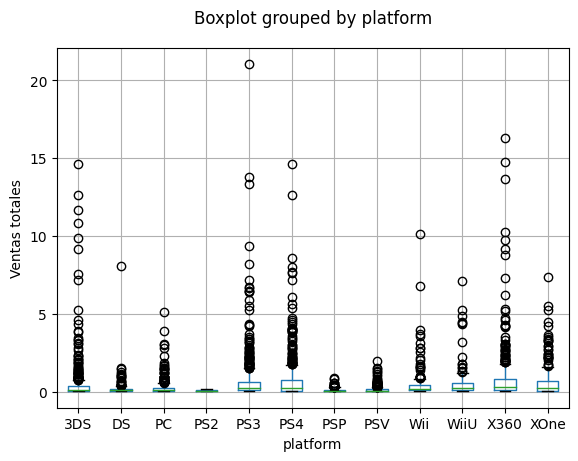

In [23]:
boxplot = global_sales.boxplot(column='total_sales', by='platform')
boxplot.set_ylabel('Ventas totales')
boxplot.set_title("")

Voy a seleccionar la plataforma que más ventas totales ha tenido en los últimos 5 años (`PS3`) para ver cómo sus ventas se ven afectadas por las reseñas de usuarios y profesionales.

I am going to select the platform that has had the highest total sales in the last 5 years (`PS3`) to see how its sales are affected by user and professional reviews.

correlación reseña profesionales y ventas: 0.18972056096447404
correlación reseña usuarios y ventas: 0.048699919896821396


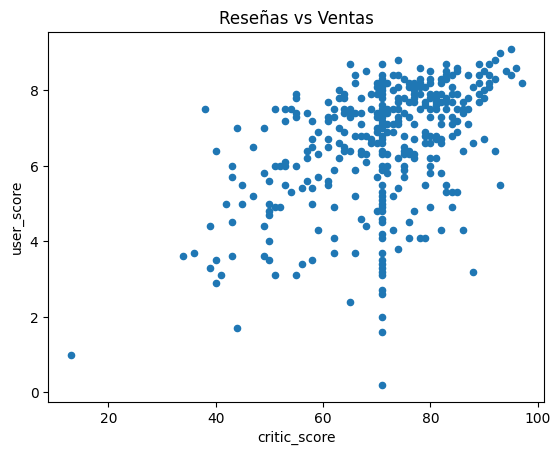

In [24]:
#Flitro el dataframe por la plataforma PS3
#Flitro dataframe for the PS3 platform
popular_platform = df_relevant_years[df_relevant_years['platform'] == 'PS3']

#Agrupo el dataframe filtrado con ventas totales y las reseñas
#Group filtered dataframe with total sales and reviews
review = popular_platform.groupby(['critic_score', 'user_score'])['total_sales'].sum().reset_index(name='sales')

#Creo un grafico de dispersión con la información agrupada
#I create a scatter plot with the grouped information
review.plot(x='critic_score', y='user_score', kind='scatter', title='Reseñas vs Ventas')

#Saco el coeficiete de correlación entre las reseñas de usuarios y profesionales y las ventas
#I draw the correlation coefficient between user and professional reviews and sales
corr_critic = df['critic_score'].corr(df['total_sales']) 
corr_user = df['user_score'].corr(df['total_sales']) 
print('correlación reseña profesionales y ventas:', corr_critic)
print('correlación reseña usuarios y ventas:', corr_user)

Las reseñas de los profesionales y los usuatios no tienen correlación con las ventas. Voy a graficar la relación de las reseñas profesionales con las ventas para la `PS3`

Professional and user reviews have no correlation with sales. I will plot the relationship of professional reviews to sales for the `PS3`.

<AxesSubplot:title={'center':'Reseñas vs Ventas'}, xlabel='user_score', ylabel='sales'>

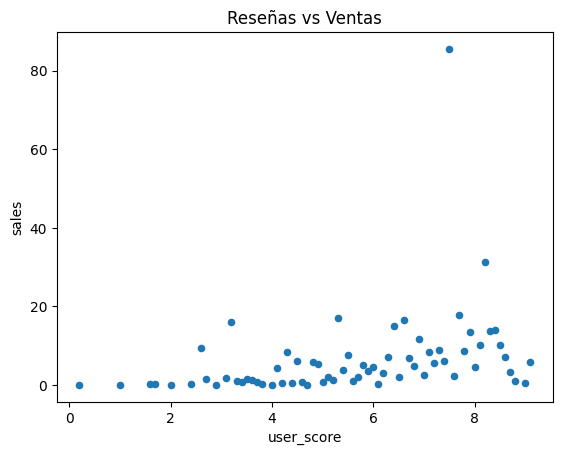

In [25]:
#Flitro el dataframe por la plataforma PS3
popular_platform = df_relevant_years[df_relevant_years['platform'] == 'PS3']

#Agrupo el dataframe filtrado con ventas totales y las reseñas profesionales 
review = popular_platform.groupby('user_score')['total_sales'].sum().reset_index(name='sales')

#Creo un grafico de dispersión con la información agrupada
review.plot(x='user_score', y='sales', kind='scatter', title='Reseñas vs Ventas')

Voy a graficar la relación de las reseñas de los usuarios con las ventas para la `PS3`:

I will graph the relationship of user reviews to sales for the `PS3`:

<AxesSubplot:title={'center':'Reseñas vs Ventas'}, xlabel='critic_score', ylabel='sales'>

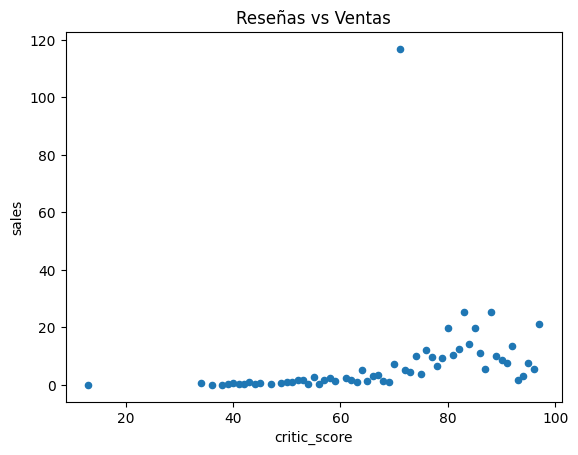

In [26]:
#Flitro el dataframe por la plataforma PS3
#Flitro dataframe for the PS3 platform
popular_platform = df_relevant_years[df_relevant_years['platform'] == 'PS3']

#Agrupo el dataframe filtrado con ventas totales y las reseñas profesionales 
#Group filtered dataframe with total sales and professional reviews 
review = popular_platform.groupby('critic_score')['total_sales'].sum().reset_index(name='sales')

#Creo un grafico de dispersión con la información agrupada
#I create a scatter plot with the grouped information
review.plot(x='critic_score', y='sales', kind='scatter', title='Reseñas vs Ventas')

Vamos a analizar las ventas de los juegos por genero / Let's analyze game sales by genre:

<AxesSubplot:title={'center':'Ventas por genero'}, xlabel='Genero', ylabel='Ventas en millones de dólares'>

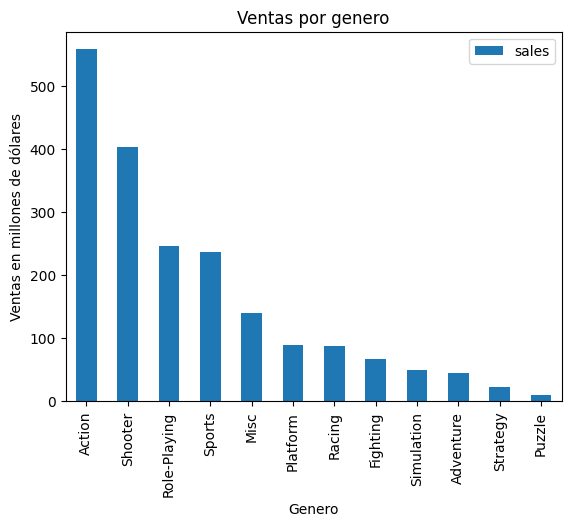

In [27]:
#Agrupo los juegos por genero y sus ventas
#Group games by genre and their sales
game_genre = df_relevant_years.groupby('genre')['total_sales'].sum().reset_index(name='sales').sort_values(by='sales', ascending=False)
game_genre

#Grafico para ver la distribución de los juegos por genero y sus ventas
#Graph to see the distribution of games by genre and their sales
game_genre.plot(kind='bar', 
                x='genre', 
                y='sales', 
                xlabel='Genero', 
                ylabel='Ventas en millones de dólares', 
                title='Ventas por genero')

Los juegos más rentables son los de acción seguidos por los de tiroteo y los que menos ingresos generan son los de rompecabezas.

The most profitable games are action games followed by shooting games and the least profitable are puzzle games.

## Determinar un perfil de usuario para cada región / Determine a user profile for each region

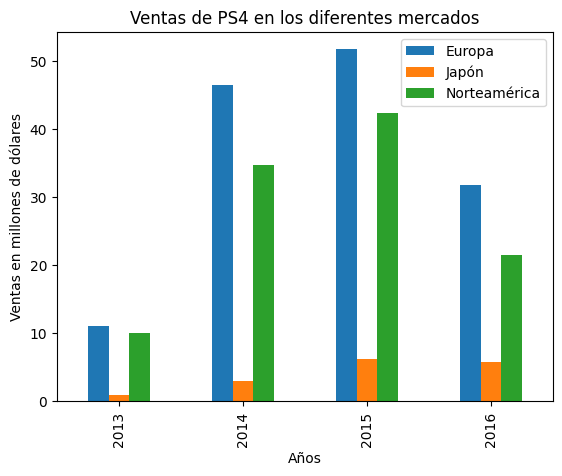

In [29]:
#Vamos a ver el comportamiento de la plataforma PS4 en los 3 mercados
#Let's take a look at the performance of the PS4 platform in the 3 markets
ps4_ventas = ps4.pivot_table(index='year_of_release', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
ps4_ventas.plot(kind='bar', 
                title = 'Ventas de PS4 en los diferentes mercados', 
                xlabel = 'Años', 
                ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

`PS4` tiene sus mayores ventas en el mercado Europeo, segudo del Norteamericano y muy por debajo en el mercado japones.

`PS4` has its highest sales in the European market, followed by the North American market and far behind in the Japanese market.


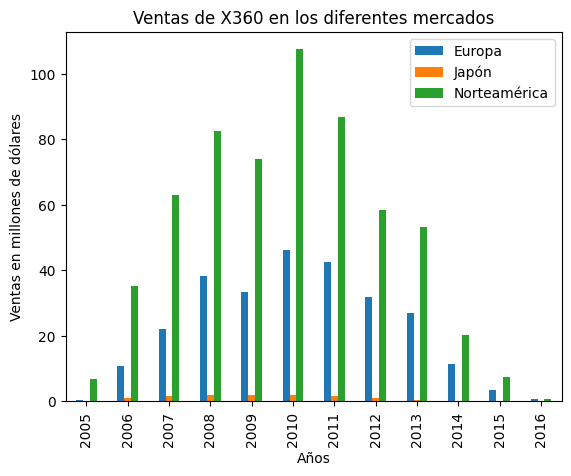

In [30]:
#Vamos a ver el comportamiento de la plataforma X360 en los 3 mercados
#Let's take a look at the performance of the X360 platform in the 3 markets
x360_ventas = x360.pivot_table(index='year_of_release', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
x360_ventas.plot(kind='bar', 
                 title = 'Ventas de X360 en los diferentes mercados', 
                 xlabel = 'Años', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])


La `X360` desde su año de lanzamiento hasta que desapareció tiene sus mayores ventas en Norteamérica, seguido por Europa y Otros mercados. Por el contrario sus ventas en Japón fuern casi nulas a través de los años.

The `X360` from its launch year until it disappeared has its biggest sales in North America, followed by Europe and Other markets. On the contrary, its sales in Japan were almost nil over the years.

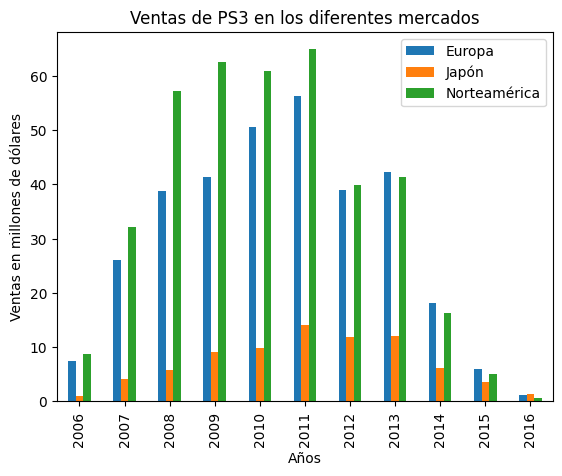

In [31]:
#Vamos a ver el comportamiento de la plataforma PS3 en los 3 mercados
#Let's take a look at the performance of the PS3 platform in the 3 markets
ps3_ventas = ps3.pivot_table(index='year_of_release', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
ps3_ventas.plot(kind='bar', 
                 title = 'Ventas de PS3 en los diferentes mercados', 
                 xlabel = 'Años', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])


`PS3` tiene sus mayores ventas en el mercado norteamericano, seguido del europeo. A partir de `2013` las ventas en Europa osn ligeramente mayores que en Norteamérica y en `2016` las vents en los 3 mercado fueron muy bajas, sin embargo, Japón fue donde más ventas se lograron, seguido de Europa y por último Norteamérica.

`PS3` has its highest sales in the North American market, followed by Europe. From `2013` the sales in Europe were slightly higher than in North America and in `2016` the sales in all 3 markets were very low, however, Japan was where most sales were achieved, followed by Europe and finally North America.

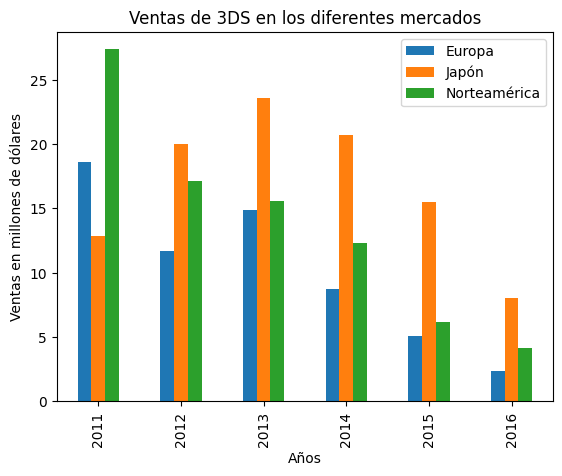

In [32]:
#Vamos a ver el comportamiento de la plataforma 3DS en los 3 mercados
#Let's take a look at the performance of the 3DS platform in the 3 markets
ds3_ventas = ds3.pivot_table(index='year_of_release', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
ds3_ventas.plot(kind='bar', 
                 title = 'Ventas de 3DS en los diferentes mercados', 
                 xlabel = 'Años', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

Para la plataforma `3DS` en el primero año tuvo mayores ventas en Norteamérica, seguido de Europa y por último Japón. Del segundo año en adelante las mayores ventas fueron en Japón, seguido de Norteamérica y dejando en último lugar a Europa.

Para 4 de las 5 principales plataformas se puede concluir que Japón es el mercado más débil, excepto con la `3DS` que el caso es completamente lo opuesto.

Vamos a analizar el comportamiento de los 5 generos principales de acuerdo a cada región:

---

Para la plataforma `3DS` en el primero año tuvo mayores ventas en Norteamérica, seguido de Europa y por último Japón. Del segundo año en adelante las mayores ventas fueron en Japón, seguido de Norteamérica y dejando en último lugar a Europa.

Para 4 de las 5 principales plataformas se puede concluir que Japón es el mercado más débil, excepto con la `3DS` que el caso es completamente lo opuesto.

Vamos a analizar el comportamiento de los 5 generos principales de acuerdo a cada región:

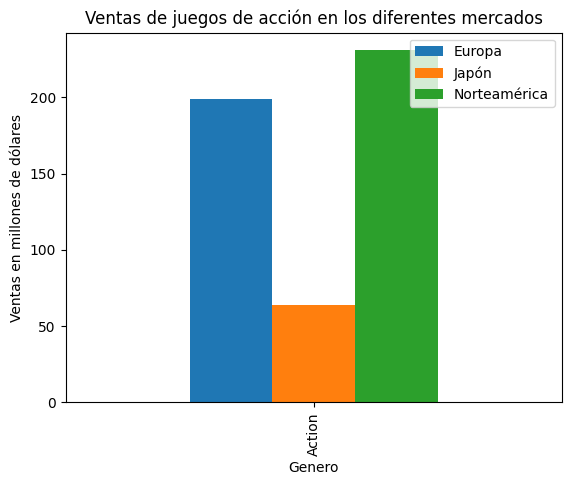

In [33]:
action = df_relevant_years[df_relevant_years['genre'] == 'Action']
df_action = action.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_action.plot(kind='bar', 
                 title = 'Ventas de juegos de acción en los diferentes mercados', 
                 xlabel = 'Genero', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

Las ventas en Norteamérica y Europa son muy superiores a las de Japón.

Sales in North America and Europe are much higher than in Japan.

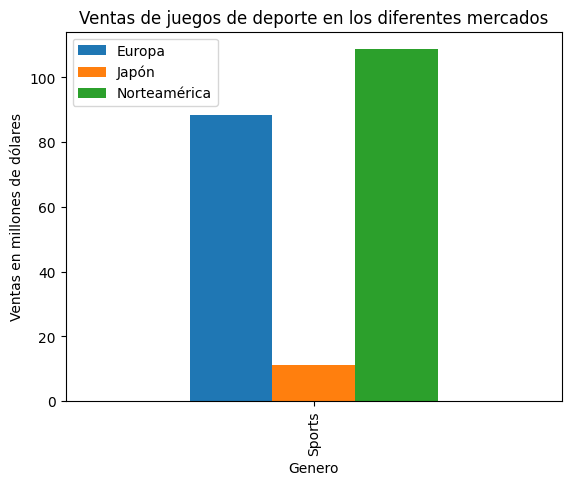

In [34]:
sports = df_relevant_years[df_relevant_years['genre'] == 'Sports']
df_sports = sports.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_sports.plot(kind='bar', 
                 title = 'Ventas de juegos de deporte en los diferentes mercados', 
                 xlabel = 'Genero', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

Las ventas en Norteamérica y Europa son muy superiores a los de Japón.

Sales in North America and Europe are much higher than in Japan.

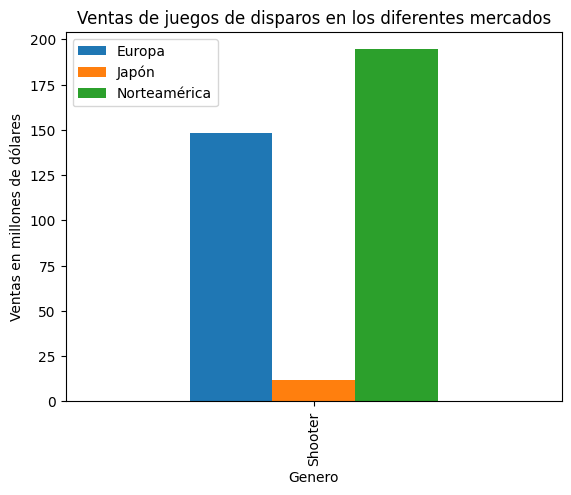

In [35]:
shooter = df_relevant_years[df_relevant_years['genre'] == 'Shooter']
df_shooter = shooter.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_shooter.plot(kind='bar', 
                 title = 'Ventas de juegos de disparos en los diferentes mercados', 
                 xlabel = 'Genero', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

Las ventas en Norteamérica y Europa son muy superiores a las de Japón.

Sales in North America and Europe are much higher than in Japan.

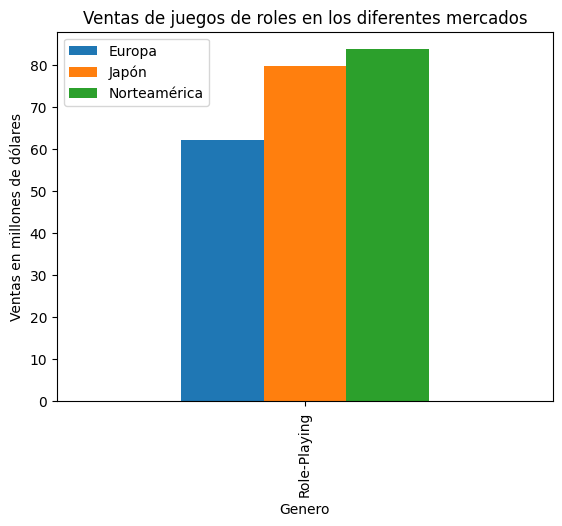

In [36]:
role_playing = df_relevant_years[df_relevant_years['genre'] == 'Role-Playing']
df_role_playing = role_playing.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_role_playing.plot(kind='bar', 
                 title = 'Ventas de juegos de roles en los diferentes mercados', 
                 xlabel = 'Genero', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

Las ventas en los 3 mercados son buenas, siendo mayores en Norteamérica y menores en Europa.

Sales in all 3 markets are good, being higher in North America and lower in Europe.

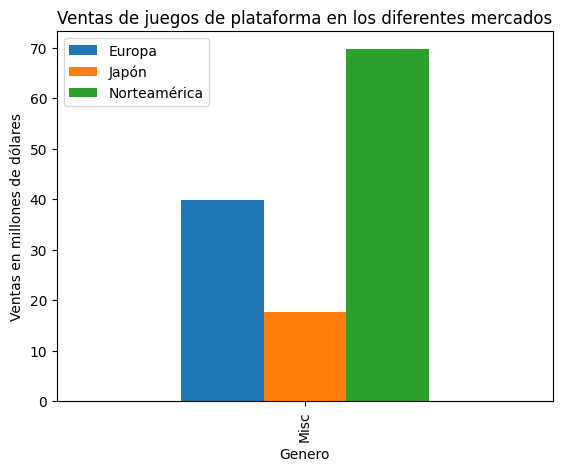

In [37]:
platform = df_relevant_years[df_relevant_years['genre'] == 'Misc']
df_platform = platform.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_platform.plot(kind='bar', 
                 title = 'Ventas de juegos de plataforma en los diferentes mercados', 
                 xlabel = 'Genero', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

Las ventas en Norteamérica son muy superiores a los demás mercados. Japón es donde menos se venden.

Para 4 de los 5 generos princilapes (`action, sports, shooter, role-playing y platform`), el comportamiento es igual. Mayores ventas en Norteamérica, seguido de Europa y por último Japón, pero para el juegos de roles Japón es su mayor mercado, seguido de Norteamérica y por último Europa.

Vamos a verificar si las clasificaciones de `ESRB` afectan a las ventas en regiones individuales:

---

Sales in North America are much higher than in other markets. Japan is where sales are the lowest.

For 4 of the 5 main genres (action, sports, shooter, role-playing and platform), the behavior is the same. The highest sales in North America, followed by Europe and finally Japan, but for role-playing games Japan is the biggest market, followed by North America and finally Europe.

Let's check if the `ESRB` ratings affect sales in individual regions:

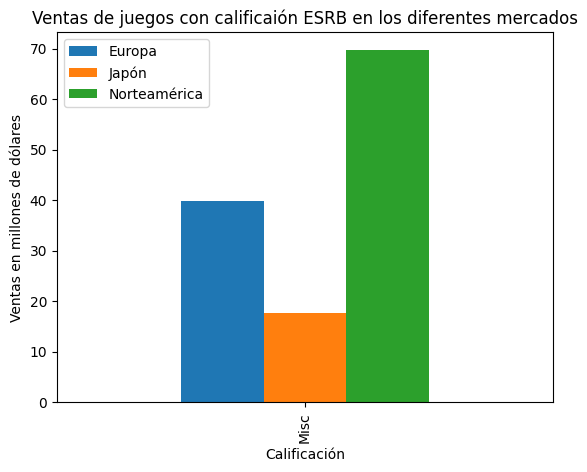

In [38]:
df_rating = df_relevant_years[df_relevant_years['rating'] == 'ESRB']
rating = df_rating.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
df_platform.plot(kind='bar', 
                 title = 'Ventas de juegos con calificaión ESRB en los diferentes mercados', 
                 xlabel = 'Calificación', 
                 ylabel = 'Ventas en millones de dólares')
plt.legend(['Europa', 'Japón', 'Norteamérica'])

La calificiación `ESRB` no tiene mayor influencia en las ventas, ya que el comportamiento es basicamente el mismo. Norteamérica, Europa y Japón en último lugar.

The `ESRB` rating has no major influence on sales, as the behavior is basically the same. North America, Europe and Japan in last place.

## Prueba de hipótesis / Hypothesis testing

Probar la hipótesis de que las calificaciones promedio de los usuarios para las plataformas `Xbox One` y `PC` son las mismas.

Test the hypothesis that the average user ratings for the `Xbox One` and `PC` platforms are the same.

In [39]:
#Prueba las hipótesis
#Testing hypotheses
xbox_one = df_relevant_years[df_relevant_years['platform'] == 'XOne']
xbox_one_score = xbox_one['user_score']
            
pc = df_relevant_years[df_relevant_years['platform'] == 'PC']
pc_score = pc['user_score']

alpha = 0.05

result = st.ttest_ind(xbox_one_score, pc_score, equal_var = False) 

print('valor-p:', result.pvalue)

if (result.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p: 0.3361293822803634
No podemos rechazar la hipótesis nula


Probar la hipótesis las calificaciones promedio de los usuarios para los géneros de `Acción` y `Deportes` son diferentes.

Test the hypothesis the average user ratings for the `Action` and `Sports` genres are different.

In [40]:
#Prueba las hipótesis
#Testing hypotheses
action = df_relevant_years[df_relevant_years['genre'] == 'Action']
action_score = action['user_score']
            
sports = df_relevant_years[df_relevant_years['genre'] == 'Sports']
sports_score = sports['user_score']

alpha = 0.05

result = st.ttest_ind(action_score, sports_score, equal_var = False) 

print('valor-p:', result.pvalue)

if (result.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor-p: 2.6364667922335543e-18
Rechazamos la hipótesis nula


## Conclusión / Conclusion

Con este analisis se puede concluir que `Norteamérica` es el mercado con mayor potencial y que la vida promedio de las plataformas es de `9 años`. También que el `rating` no tiene una gran inflencia en las ventas y que los generos que más se mueven con `action, sports, shooter, role-playing y platform`.

With this analysis it can be concluded that `North America` is the market with the greatest potential and that the average life of the platforms is `9 years`. Also that the `rating` does not have a great influence on sales and that the genres that move the most are `action, sports, shooter, role-playing and platform`.